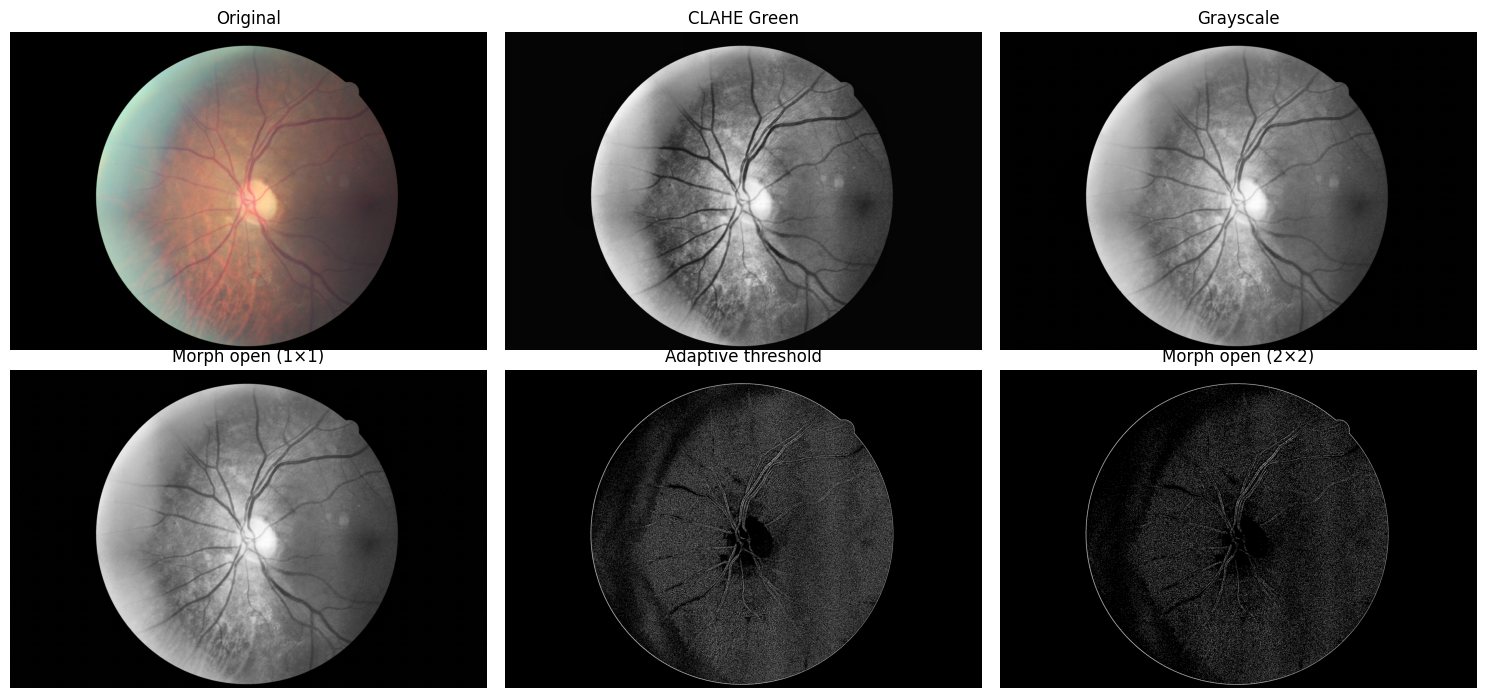

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------- 1. Load image (upload 10_left.jpeg to Colab first) ----------
img = cv2.imread("10_left.jpeg")            # BGR
if img is None:
    raise FileNotFoundError("Upload 10_left.jpeg to the runtime first.")

# ---------- 2. Pre‑processing steps ----------
b, g, r = cv2.split(img)

clahe = cv2.createCLAHE(clipLimit=4.0)
g_enh = clahe.apply(g)

gray = cv2.cvtColor(cv2.merge((b, g_enh, r)), cv2.COLOR_BGR2GRAY)

k1 = np.ones((1, 1), np.uint8)
k2 = np.ones((2, 2), np.uint8)

mo1 = cv2.morphologyEx(gray, cv2.MORPH_OPEN, k1)  # (no visible change)

thr = cv2.adaptiveThreshold(
    mo1, 255,
    cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,
    9, 5)

mo2 = cv2.morphologyEx(thr, cv2.MORPH_OPEN, k2)

# make 3‑channel mask for display consistency
stacked = np.stack((mo2,)*3, axis=-1)

# ---------- 3. Display side‑by‑side ----------
titles = [
    "Original", "CLAHE Green", "Grayscale",
    "Morph open (1×1)", "Adaptive threshold", "Morph open (2×2)"
]
images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB),
          cv2.merge((g_enh,)*3),
          gray,
          mo1,
          thr,
          mo2]

plt.figure(figsize=(15, 7))
for i, (im, title) in enumerate(zip(images, titles), 1):
    plt.subplot(2, 3, i)
    cmap = None if im.ndim == 3 else "gray"
    plt.imshow(im, cmap=cmap)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()
